In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv("x_train.csv",index_col=False)
y_train = pd.read_csv("y_train.csv",index_col=False)
x_test = pd.read_csv("x_test.csv",index_col=False)
y_test = pd.read_csv("y_test.csv",index_col=False)

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

len(X_resampled)

In [4]:
model = KNeighborsClassifier(n_neighbors=6,leaf_size=10)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output

model.score(x_test,y_test)
#predicted= model.predict() 

# 0:Overcast, 2:Mild
#print(predicted)

c:\ProgramData\Miniconda3\envs\tfg\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6949105436859475

In [5]:
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78      3302
         2.0       0.61      0.62      0.61      1096
         3.0       0.75      0.88      0.81      4672
         4.0       0.65      0.44      0.52       656
         5.0       0.71      0.59      0.65      3288
         6.0       0.62      0.69      0.65      2386
         7.0       0.66      0.72      0.69      4927
         8.0       0.64      0.62      0.63      4490
         9.0       0.73      0.32      0.44       111
        10.0       0.72      0.66      0.69       673
        11.0       0.76      0.55      0.64       846
        12.0       0.49      0.14      0.22       392
        13.0       0.77      0.65      0.71       213
        17.0       0.86      0.85      0.85       807
        20.0       0.77      0.35      0.48       158
        25.0       0.64      0.69      0.66       768

    accuracy                           0.69     28785
   macro avg       0.70   

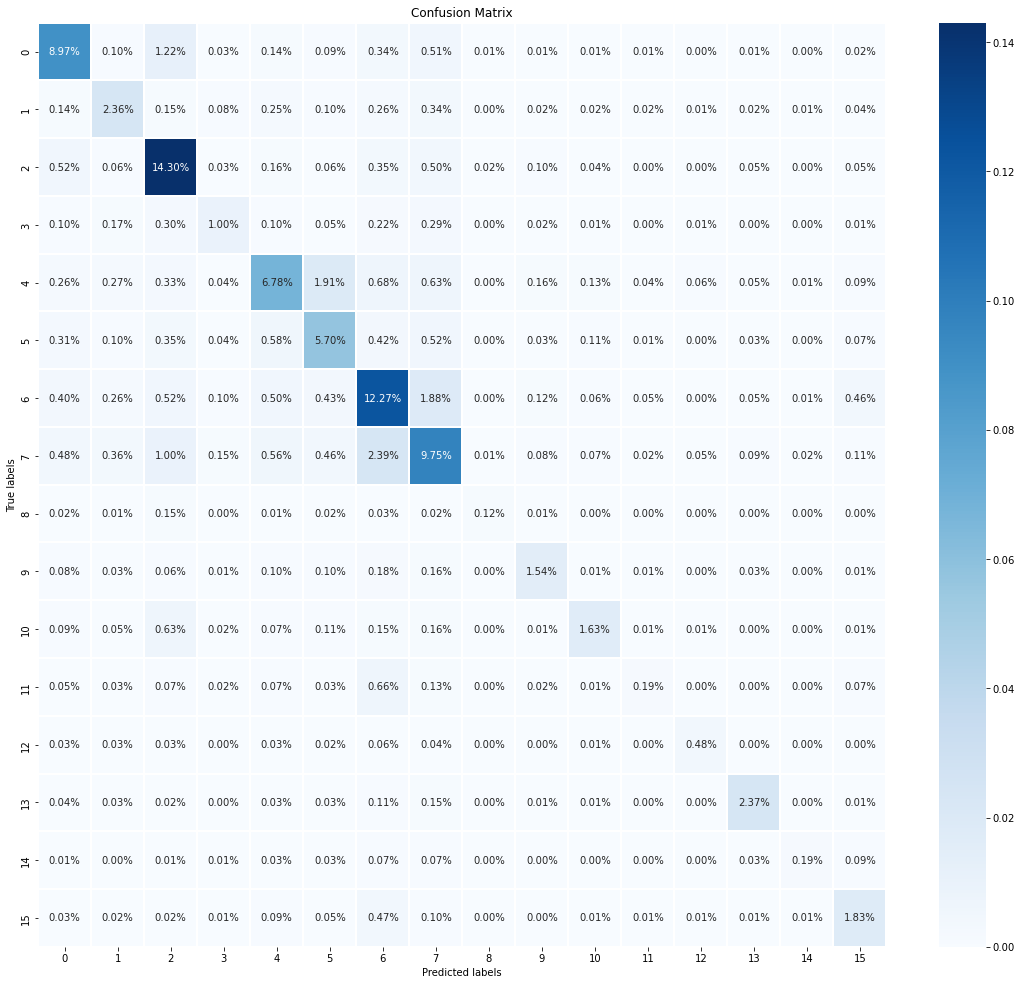

In [6]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');